## Libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## read data

In [2]:
data = pd.read_csv ("extracted_features.csv")

In [3]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,4612,4613,4614,4615,4616,4617,4618,4619,4620,4621
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,...,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.252976,0.253850,0.254146,0.254460,0.254539,0.255001,0.255291,0.255618,0.255678,0.256142,...,-0.361113,-0.363039,-0.368366,-0.371656,-0.376130,-0.376736,-0.372115,-0.370660,-0.365544,0.399336
std,0.109494,0.109618,0.109508,0.109402,0.109509,0.109268,0.109152,0.109044,0.109114,0.108848,...,0.551732,0.551547,0.556399,0.564214,0.569144,0.571363,0.567235,0.567022,0.563397,0.490033
min,0.021222,0.021250,0.021306,0.021326,0.021479,0.021514,0.021563,0.021578,0.021307,0.021469,...,-2.611010,-2.730420,-2.657370,-2.692930,-2.531020,-2.711810,-2.776420,-2.809960,-2.895980,0.000000
25%,0.153440,0.154344,0.154596,0.155304,0.155442,0.156120,0.156467,0.156639,0.157282,0.158864,...,-0.721745,-0.727030,-0.737455,-0.742970,-0.751130,-0.748605,-0.747535,-0.723687,-0.727270,0.000000
50%,0.277024,0.278037,0.277780,0.277711,0.278060,0.278025,0.279073,0.278999,0.279404,0.279439,...,-0.345720,-0.352620,-0.360915,-0.359960,-0.358970,-0.356630,-0.361950,-0.361945,-0.351710,0.000000
75%,0.334548,0.335225,0.334734,0.335228,0.335654,0.335432,0.336029,0.336320,0.336740,0.337070,...,0.006567,0.005358,0.017273,0.028523,0.008165,0.012490,0.017195,0.000063,0.003023,1.000000
max,0.533359,0.534139,0.535233,0.536544,0.537668,0.538444,0.539243,0.539599,0.539413,0.539621,...,1.626480,1.607370,1.726360,1.774620,1.750620,1.773920,1.680630,1.673320,1.498440,1.000000


## basic stuff

In [4]:
X , Y = data.values [ : , : -1 ] , data.values [ : , -1 ] 

In [5]:
print ( "classes are : " , np.unique ( Y ) )  

classes are :  [0. 1.]


In [6]:
X.shape

(904, 4620)

In [7]:
Y.shape

(904,)

## split data train / test 

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.2 , random_state = 7 )

## train

In [9]:
model = RandomForestClassifier( n_estimators=100 , random_state = 7 )

In [10]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [11]:
print ("baseline accuracy " , (  (model.predict(X_test) == Y_test).astype("int8").sum() / Y_test.shape[0]   ) )

baseline accuracy  0.8232044198895028


# Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[106,   8],
       [ 24,  43]], dtype=int64)

Considering confusion matrix above:

True Positive = 106

False negative = 8

False positive = 24

True Negative = 43

In [25]:
print("Sensitivity:",a[0][0]/(a[0][0]+a[0][1]))

Sensitivity: 0.9298245614035088


In [26]:
print("Specificty:", a[1][1]/(a[1][1]+a[1][0]))

Specificty: 0.6417910447761194


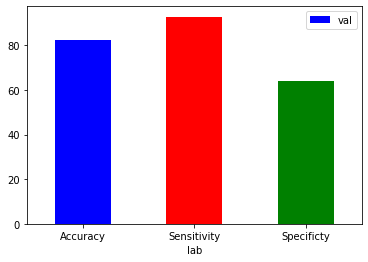

In [27]:
df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[82.3,92.9,64.1]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])